# plots for MsC

## field strngth dependency of distance 
Study using COMSOL simulation for field strength

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
field1 = [9.97327e8, 9.49900e8, 9.14428e8, 8.86424e8, 4.49505e8, 2.66799e8]
field2 = [1.99465e9, 1.89980e9, 1.82886e9, 1.77284e9, 8.99784e8, 5.33598e8]
field3 = [2.99199e9, 2.84970e9, 2.74328e9, 2.65926e9, 1.34968e9, 8.00400e8]

distances = [25, 50, 75, 100, 500, 1000]

Text(0.5, 1.0, 'field strength dependency on distance')

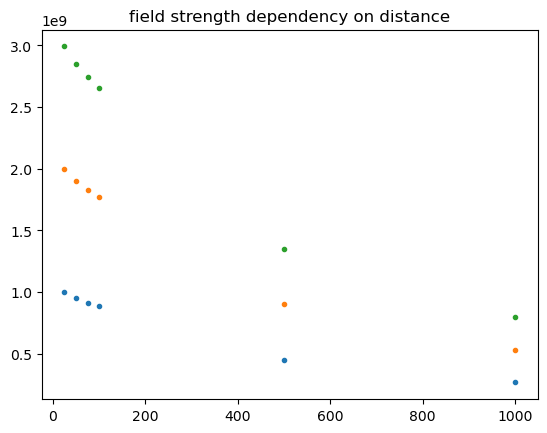

In [53]:
plt.plot(distances, field1, '.')
plt.plot(distances, field2, '.')
plt.plot(distances, field3, '.')
plt.title('field strength dependency on distance')



In [54]:
p1 = np.polyfit(distances, np.log(field1), 1)
p2 = np.polyfit(distances, np.log(field2), 1)
p3 = np.polyfit(distances, np.log(field3), 1)

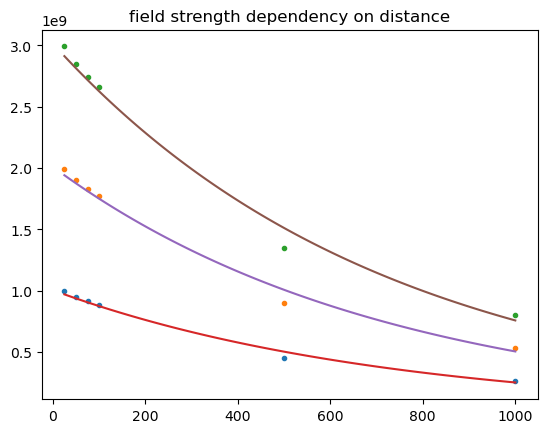

In [55]:
a1 = np.exp(p1[1])
a2 = np.exp(p2[1])
a3 = np.exp(p3[1])
b1 = p1[0]
b2 = p2[0]
b3 = p3[0]

x_fitted1 = np.linspace(np.min(distances), np.max(distances), 100)
y_fitted1 = a1 * np.exp(b1 * x_fitted1)
x_fitted2 = np.linspace(np.min(distances), np.max(distances), 100)
y_fitted2 = a2 * np.exp(b2 * x_fitted2)
x_fitted3 = np.linspace(np.min(distances), np.max(distances), 100)
y_fitted3 = a3 * np.exp(b3 * x_fitted3)


plt.plot(distances, field1, '.')
plt.plot(distances, field2, '.')
plt.plot(distances, field3, '.')
plt.title('field strength dependency on distance')
plt.plot(x_fitted1, y_fitted1)
plt.plot(x_fitted2, y_fitted2)
plt.plot(x_fitted3, y_fitted3)

In [56]:
p1 = np.poly1d(np.polyfit(distances, field1, 2))
p2 = np.poly1d(np.polyfit(distances, field2, 2))
p3 = np.poly1d(np.polyfit(distances, field3, 2))

Text(0.5, 1.0, 'field strength dependency on distance')

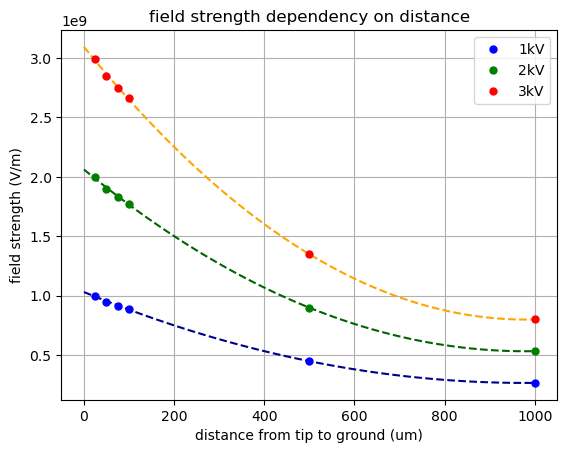

In [77]:
polyline = np.linspace(0, 1000, 100) 
plt.plot(polyline, p1(polyline), '--', color='darkblue')
plt.plot(polyline, p2(polyline), '--', color='darkgreen')
plt.plot(polyline, p3(polyline), '--', color='orange')
plt.plot(distances, field1, '.', label='1kV', markersize ='10', color='b')
plt.plot(distances, field2, '.', label='2kV', markersize ='10', color='green')
plt.plot(distances, field3, '.', label='3kV', markersize ='10', color='r')
plt.legend()
plt.xlabel('distance from tip to ground (um)')
plt.ylabel('field strength (V/m)')
plt.grid()
plt.title('field strength dependency on distance')


In [31]:
from sklearn.metrics import r2_score 
print(r2_score(field1,  
               p1(distances))) 
print(r2_score(field2,  
               p2(distances))) 
print(r2_score(field3,  
               p3(distances))) 

0.9998356749162027
0.9998354122962749
0.9998352504679839


will see the first four points and do a linear fit. By doing this, we can do an extrapolation for even smaller distances

In [79]:
distances = [25, 50, 75, 100]
field1 = [9.97327e8, 9.49900e8, 9.14428e8, 8.86424e8]
field2 = [1.99465e9, 1.89980e9, 1.82886e9, 1.77284e9]
field3 = [2.99199e9, 2.84970e9, 2.74328e9, 2.65926e9]

p1 = np.poly1d(np.polyfit(distances, field1, 1))
p2 = np.poly1d(np.polyfit(distances, field2, 1))
p3 = np.poly1d(np.polyfit(distances, field3, 1))

Text(0.5, 1.0, 'field strength dependency on distance')

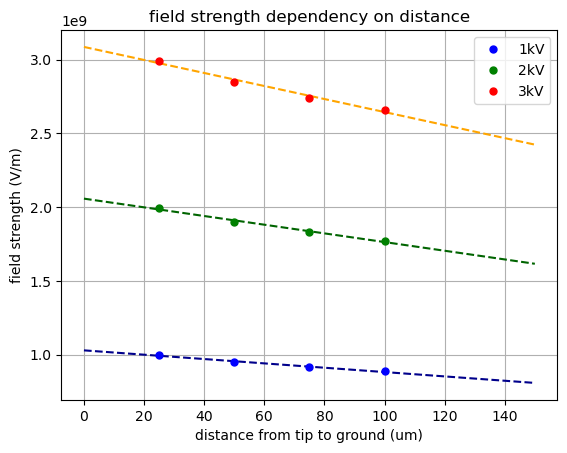

In [80]:
polyline = np.linspace(0, 150, 100) 
plt.plot(polyline, p1(polyline), '--', color='darkblue')
plt.plot(polyline, p2(polyline), '--', color='darkgreen')
plt.plot(polyline, p3(polyline), '--', color='orange')
plt.plot(distances, field1, '.', label='1kV', markersize ='10', color='b')
plt.plot(distances, field2, '.', label='2kV', markersize ='10', color='green')
plt.plot(distances, field3, '.', label='3kV', markersize ='10', color='r')
plt.legend()
plt.xlabel('distance from tip to ground (um)')
plt.ylabel('field strength (V/m)')
plt.grid()
plt.title('field strength dependency on distance')


# Plots of radius x field

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
path = '/home/caio/remote/comsol/radius_field/LXe_maxx.csv'
col = ['radius', 'electricField', 'voltage']

data = pd.read_csv(path, sep=',', usecols=col)


In [123]:
v800 = data[data['voltage'] == -800].iloc[:]
v1000 = data[data['voltage'] == -1000].iloc[:]
v1500 = data[data['voltage'] == -1500].iloc[:]
v2000 = data[data['voltage'] == -2000].iloc[:]
v3000 = data[data['voltage'] == -3000].iloc[:]

data = [v800, v1000, v1500, v2000, v3000]
label = ['V = -800V', 'V = -1000V', 'V = -1500V', 'V = -2000V', 'V = -3000V']

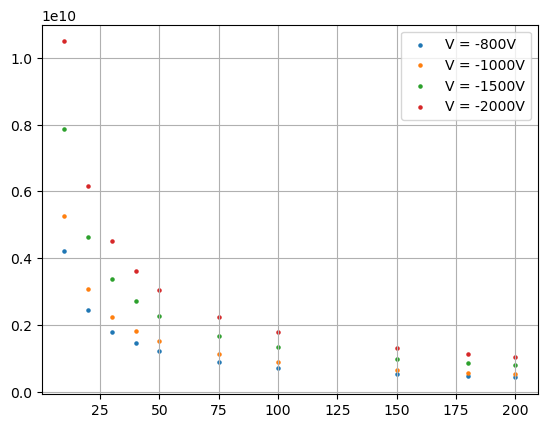

In [124]:
for i in range(0,4):
    plt.scatter(data[i]['radius'], data[i]['electricField'], s=5, label = label[i])

plt.legend()
plt.grid()


2602311161.0906878
-0.01030929233589047


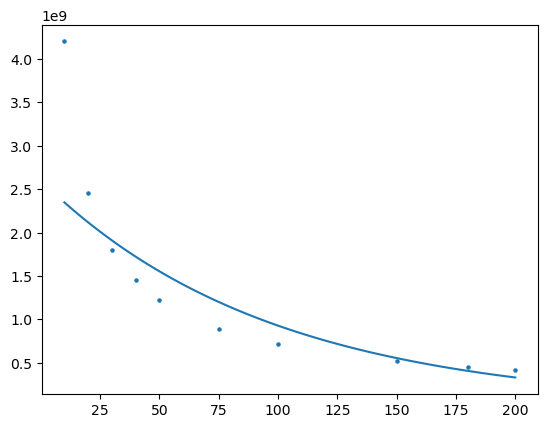

In [126]:
d = 0
p = np.polyfit(data[d]['radius'], np.log(data[d]['electricField']), 1)
#p =np.poly1d(np.polyfit(data[d]['radius'], data[d]['electricField'], 6))
#fitted.append(p)
a_ele = np.exp(p[1])
#a.append(a_ele)
print(a_ele)
b_ele = p[0]
#b.append(b_ele)
print(b_ele)

x_fitted = np.linspace(np.min(data[d]['radius']), np.max(data[d]['radius']), 100)
y_fitted = a_ele * np.exp(b_ele * x_fitted)

plt.scatter(data[d]['radius'], data[d]['electricField'], s=5, label = label[i])
plt.plot(x_fitted, y_fitted)

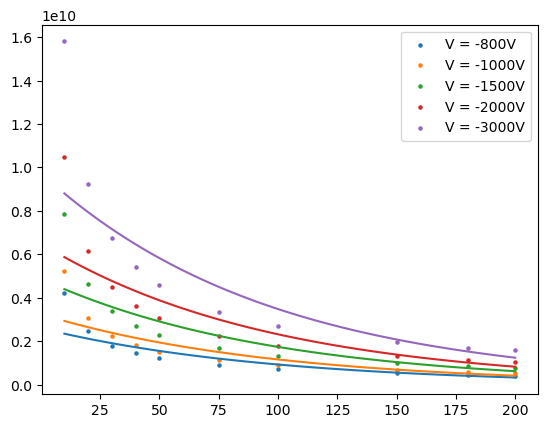

In [127]:
fitted = []
a = []
b = []

for d in range(0, len(data)):
    p = np.polyfit(data[d]['radius'], np.log(data[d]['electricField']), 1)
    #p =np.poly1d(np.polyfit(data[d]['radius'], data[d]['electricField'], 6))
    fitted.append(p)
    a_ele = np.exp(p[1])
    a.append(a_ele)
    #print(a)
    b_ele = p[0]
    b.append(b_ele)
    #print(b)

    x_fitted = np.linspace(np.min(data[d]['radius']), np.max(data[d]['radius']), 100)
    y_fitted = a[d] * np.exp(b[d] * x_fitted)

    plt.scatter(data[d]['radius'], data[d]['electricField'], s=5, label = label[d])
    plt.legend()
    plt.plot(x_fitted, y_fitted)

    #polyline = np.linspace(0, 200, 100)
    #plt.plot(polyline, p(polyline), '--')




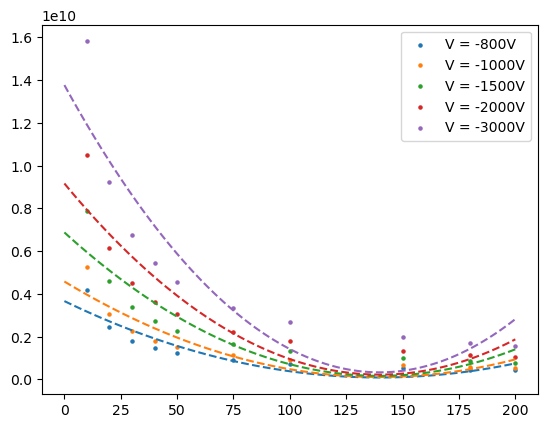

In [ ]:
fitted = []
a = []
b = []

for d in range(0, len(data)):
    p = np.poly1d(np.polyfit(data[d]['radius'], data[d]['electricField'], 2))
    fitted.append(p)
    a_ele = np.exp(p[1])
    a.append(a_ele)
    #print(a)
    b_ele = p[0]
    b.append(b_ele)
    #print(b)

    plt.scatter(data[d]['radius'], data[d]['electricField'], s=5, label = label[d])
    plt.legend()

    polyline = np.linspace(0, 200, 100)
    plt.plot(polyline, p(polyline), '--')


